# Display the artifical data based on the UCR classification dataset

In [1]:
from TSB_UAD.transformer.artificialConstruction import construct_sbd_matrix,clustering_mst,construct_anomaly
from TSB_UAD.transformer.transformer import plotdata
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx 

In [3]:
# prepare UCR classification data 

name = 'Symbols'
data_path = './../../data/UCR2018-NEW/'+name+'/'+name+'_TRAIN'
data_train = np.loadtxt(data_path, delimiter=',')


X_train = data_train[:,1:]
y_train = data_train[:,0].astype(int)

In [4]:
# construct Affinity matrix and MST for 

adjacencyMatrix = construct_sbd_matrix(X_train, y_train)
clusterIndex = clustering_mst(adjacencyMatrix)

G = nx.from_numpy_matrix(adjacencyMatrix, parallel_edges=False)
T = nx.maximum_spanning_tree(G,weight='weight')

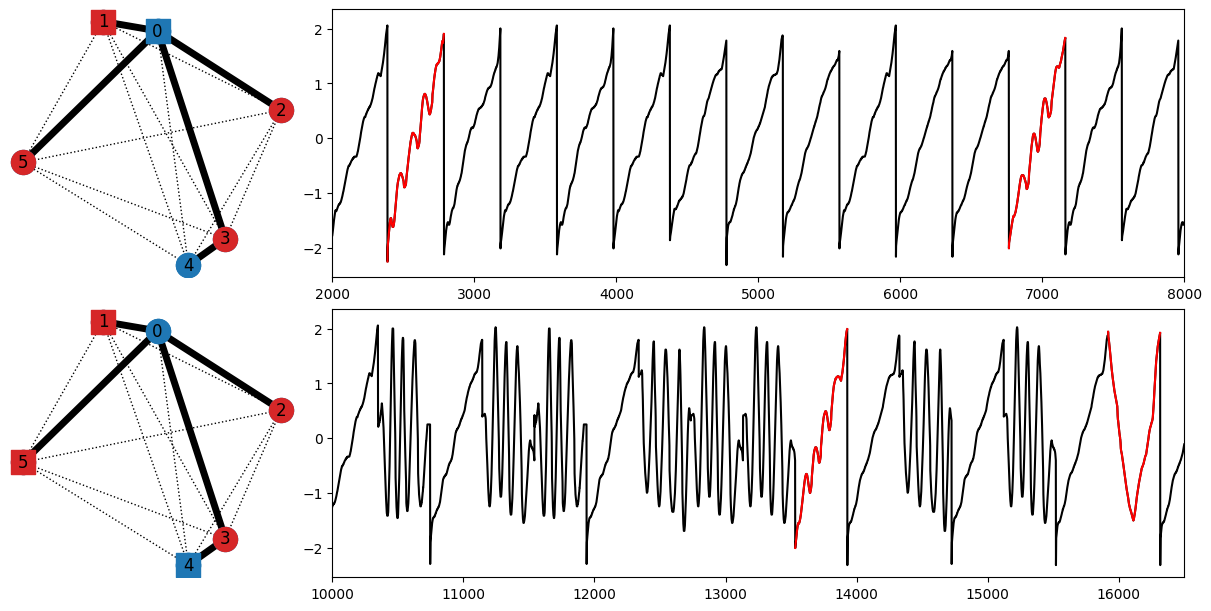

In [6]:
fig3 = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig3.add_gridspec(2, 4)


f3_ax1 = fig3.add_subplot(gs[0, 0])
pos = nx.spring_layout(G, seed=5)  # positions for all nodes
# nx.draw(G, pos, with_labels=True)  # use spring layout
nx.draw_networkx_edges(G, pos, style='dotted')
nx.draw(T, pos, with_labels=True, width=5)
nx.draw_networkx_nodes(G, pos, nodelist=np.where(clusterIndex==0)[0].tolist(), node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=np.where(clusterIndex==1)[0].tolist(), node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color="tab:blue",node_shape='s')
nx.draw_networkx_nodes(G, pos, nodelist=[1], node_color="tab:red", node_shape='s')


f3_ax4 = fig3.add_subplot(gs[1, 0])
pos = nx.spring_layout(G, seed=5)  # positions for all nodes
# nx.draw(G, pos, with_labels=True)  # use spring layout
nx.draw_networkx_edges(G, pos, style='dotted')
nx.draw(T, pos, with_labels=True, width=5)
nx.draw_networkx_nodes(G, pos, nodelist=np.where(clusterIndex==0)[0].tolist(), node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=np.where(clusterIndex==1)[0].tolist(), node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=[4], node_color="tab:blue",node_shape='s')
nx.draw_networkx_nodes(G, pos, nodelist=[1,5], node_color="tab:red", node_shape='s')

f3_ax2 = fig3.add_subplot(gs[0, 1:])

K=2    # number of anomaly segments
anomalyRatio=0.05
seed=30

synX, synY, window, cr, nc, na = construct_anomaly(X_train, y_train, clusterIndex, K, anomalyRatio, seed, return_statistics=True)

plotdata(synX,synY, ax=f3_ax2, max_len=100000) 
f3_ax2.set_xlim([2000,8000])

f3_ax3 = fig3.add_subplot(gs[1, 1:])


K=2
anomalyRatio=0.05
seed=3

synX, synY, window, cr, nc, na = construct_anomaly(X_train, y_train, clusterIndex, K, anomalyRatio, seed, return_statistics=True)

plotdata(synX,synY, ax=f3_ax3, max_len=100000) 
f3_ax3.set_xlim([10000,16500])
f3_ax3.set_yticks([-2,-1,0,1,2])